Revisão - Análise Exploratória de Dados
========================================================

Professor: Marcos Cesar Gritti  
Email: cesargritti@gmail.com

Neste módulo vamos aprender sobre:
 1. **Análise Exploratória;**
 2. **Tratamento de Dados;**
 3. **Detecção e remoção de outliers;**

In [1]:
import pandas as pd

dados = pd.read_csv("dados.csv")
dados.head()

,localidade,tipo,loc_x,loc_y,mercado_mais_proximo,farmacia_mais_proxima,escola_mais_proxima,num_penit_4km,num_penit_500m,idade_imovel,area,preco
0,Localidade 4,Tipo 1,0.081382,0.727021,3603.941384,2002.686030,1124.043113,0,0,4,123.0,731600
1,Localidade 4,Tipo 2,0.367980,0.145812,2185.209139,683.811862,2462.825432,0,0,13,143.0,318600
2,Localidade 3,Tipo 2,0.332654,0.432904,1025.698339,957.451552,1049.112117,0,0,12,150.0,1000800
3,Localidade 4,Tipo 1,0.159663,0.884596,NaN,3723.067390,1296.121182,0,0,8,160.0,678200
4,Localidade 3,Tipo 1,0.156154,0.836320,3925.306331,705.807343,4178.062758,0,0,12,134.0,1215100


1 - Análise exploratória
===================

Agora que carregamos os dados no *notebook*, precisamos explorá-los para encontrar eventuais inconsistências.
No dia a dia de trabalho de um *Cientista de Dados*, é muito comum encontrar:
 - Campos nulos (NaN);
 - Variáveis nominais não padronizadas (ex: "MAÇA", "maça", "MACA", "Maca ");
 - Variáveis contínuas (intervalar ou de razão) fora de escala;
 - Preenchimento incorreto de campos (ex: Espera-se nome da fruta, mas campo foi preenchido com o nome da cor);
 
Dentre as etapas do processo de **Preparação de Dados** e **Análise Exploratória**, a *limpeza* do conjunto de dados é a que despende maior tempo, e que tem papel chave quanto ao sucesso do projeto. Por quê? Como veremos em aulas futuras, alguns algoritmos de *Aprendizado de Máquina* são gulosos, ou seja, encontrarão uma resposta até mesmo para os ruídos presentes no seu conjunto de treinamento (conceito de *Overfitting*).

Vamos começar identificando que variáveis existem no conjunto, e seus respectivos tipos, utilizando os comandos:
  - `dtypes`: para verificar o tipo de cada coluna;
  - `sample(N)`: para coletar uma pequena amostra que pode nos ajudar a sanar dúvidas sobre os tipos;

In [2]:
dados.dtypes

localidade                object
tipo                      object
loc_x                    float64
loc_y                    float64
mercado_mais_proximo     float64
farmacia_mais_proxima    float64
escola_mais_proxima      float64
num_penit_4km              int64
num_penit_500m             int64
idade_imovel               int64
area                     float64
preco                      int64
dtype: object

In [3]:
dados.sample(5).T

,208,1957,662,70,1594
localidade,Localidade 1,Localidade 4,Localidade 3,Localidade 2,Localidade 3
tipo,Tipo 2,Tipo 2,NaN,Tipo 1,Tipo 1
loc_x,0.845866,0.611441,0.0038,0.646221,0.13573
loc_y,0.607031,0.55449,0.321733,0.989907,0.480483
mercado_mais_proximo,1595.549841,4434.560189,4318.668698,5041.958462,2550.288374
farmacia_mais_proxima,1492.628306,814.02772,3302.281106,2620.214769,1426.445842
escola_mais_proxima,1970.638443,1230.992878,1725.720086,3409.031585,2907.77455
num_penit_4km,0,0,0,1,0
num_penit_500m,0,0,0,0,0
idade_imovel,16,7,34,10,27


Nosso conjunto de dados representa uma base imobiliária, e é formado pelas seguintes colunas:

| Nome                  | Descrição                                              | Tipo               |
| ------------------    | ------------------------------------------------------ | ------------------ |
| localidade            | A localidade do imóvel                                 | object (string)    |
| tipo                  | O tipo do imóvel                                       | object (string)    |
| loc_x                 | Coordenada x do imóvel em um mapa local de referência  | float64            |
| loc_y                 | Coordenada y do imóvel em um mapa local de referência  | float64            |
| mercado_mais_proximo  | Distância do mercado mais próximo, em metros           | float64            |
| farmacia_mais_proxima | Distância da farmácia mais próxima, em metros          | float64            |
| escola_mais_proxima   | Distância da escola mais próxima, em metros            | float64            |
| num_penit_4km         | Número de penitenciárias em um raio de 4km do imóvel   | int64              |
| num_penit_500m        | Número de penitenciárias em um raio de 500m do imóvel  | int64              |
| idade_imovel          | Idade do imóvel                                        | int64              |
| area                  | Área do imóvel, em $m^2$                               | float64            |
| preco                 | O preço do imóvel, em R$                               | int64              |

* O tipo `int64`, no *Python*, representa o conjunto dos números naturais $\mathbb{N}$
* O tipo `float64`, no *Python*, representa o conjunto dos números reais $\mathbb{R}$
* O tipo `object`, no *Python*, pode representar uma **string** ou uma estrutura de dados composta (`list`, `dict`, classes customizadas, entre outras)

Não existe uma receita de bolo exata para tratamento de dados, uma vez natureza das variáveis coletadas varia muito de problema à problema. Para este caso de estudo, vamos começar verificando o conteúdo das variáveis de tipo `object`. Como já sabemos que estes campos estão armazenando valores do tipo `string`, uma boa pergunta inicial seria: Quais os possíveis valores destes campo?

Para responder a esta pergunta, podemos utilizar a função `unique`:

In [4]:
dados.localidade.unique()

array(['Localidade 4', 'Localidade 3', 'localidade 4', 'Localidade 2',
       'Localidade 9', 'Localidade 1', 'Localidade 7', 'localidade 3',
       'LOCALIDADE 2', 'localidade 1', 'LOCALIDADE 1', nan,
       'Localidade 8', 'Tipo 3', 'localidade 2', 'LOCALIDADE 3',
       'localidade 9', 'LOCALIDADE 4', 'Tipo 2', 'Localidade 5',
       'Localidade 6', 'localidade 5', 'Tipo 4', 'Localidade 10',
       'tipo 4', 'localidade 7'], dtype=object)

E quanto às variáveis do tipo `int64` ou `float64`?
Podemos descobrir o número de valores não nulos (`count`), a média (`mean`), e o desvio padrão (`std`), os valores
máximo e mínimo (`min`, `max`), e os percentils (`25%`, `50%`, `75%`) usando a função `describe`:

In [5]:
dados.describe().T

,count,mean,std,min,25%,50%,75%,max
loc_x,2027.0,0.505057,0.288761,0.000530,0.250873,0.507216,0.746902,9.997262e-01
loc_y,2027.0,0.502364,0.286709,0.000855,0.254952,0.510968,0.746523,9.995796e-01
mercado_mais_proximo,1960.0,3085.069199,1712.164685,37.932408,1797.409837,2812.603846,4088.312904,9.733443e+03
farmacia_mais_proxima,1971.0,2673.165619,1537.243055,49.678746,1475.420650,2397.181186,3617.732172,8.063493e+03
escola_mais_proxima,1967.0,2430.170505,1319.775650,63.839485,1431.681915,2239.726222,3274.790478,7.336996e+03
num_penit_4km,2027.0,0.303404,0.468350,0.000000,0.000000,0.000000,1.000000,2.000000e+00
num_penit_500m,2027.0,0.007893,0.088516,0.000000,0.000000,0.000000,0.000000,1.000000e+00
idade_imovel,2027.0,15.399605,12.601460,0.000000,6.000000,11.000000,21.000000,5.000000e+01
area,1977.0,124.648963,40.132097,51.000000,94.000000,120.000000,154.000000,2.460000e+02
preco,2027.0,483698.273310,248179.822420,131900.000000,291000.000000,451100.000000,623650.000000,1.467700e+06


**O que é quantil/percentil/quartil?**

Quantils são pontos estabelecidos em intervalos regulares em uma lista ordenada que informa o percentual de dados abaixo de um limiar em uma amostra.

Exemplo de cálculo de quantil:

Dada uma lista de valores desordenados $[5, 3, 1, 10, 4]$ o quantil nos diz o número índice da lista no qual $x$% da população (elementos da lista) são menores do que o valor apontado pelo índice. Por exemplo, se ordenarmos a lista de forma crescente, obtemos $[1, 3, 4, 5, 10]$.

Para calcular o quantil 0.5 (equivalente a mediana, e também ao segundo quartil), basta encontrar o índice central da lista. Nesta caso, a lista contém 5 elementos, sendo o índice 3 seu elemento central. Logo, nosso $q_{0.5} = 4$, significando que 50% dos dados de nossa amostra são menores que 4.

Equivalências:

| Quantil | Quartil | Percentil |
| ------- | ------- | --------- |
| 0.25    | 1       | 25%       |
| 0.5     | 2       | 50%       |
| 0.75    | 3       | 75%       |

A combinação de quantils com outras propriedades de uma amostra (como a média, valor mínimo, máximo e variância) nos fornece uma visão precisa da distribuição dos dados sob observação. Com o auxílio da biblioteca `seaborn`, podemos criar representação pictóricas destas informações, como no caso do Diagrama de Caixas (`boxplot`) e o Diagrama Violino (`violinplot`) apresentado abaixo: 


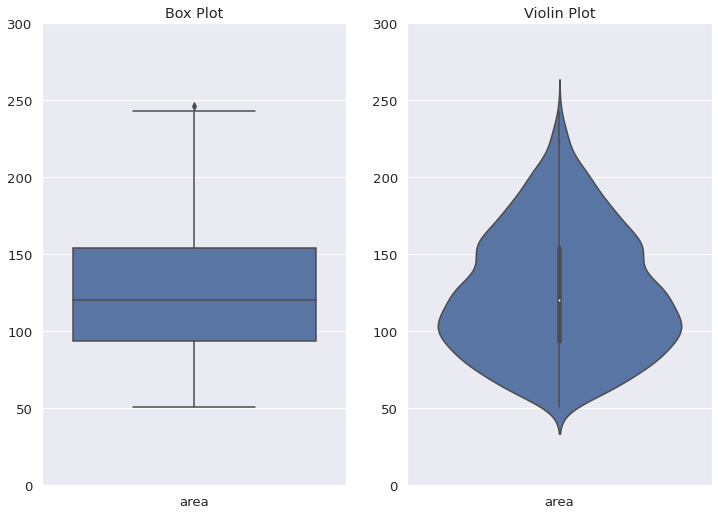

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ajustando o tamanho padrão das imagens e fontes
sns.set(font_scale=1.2, rc={
    "figure.figsize": (12, 8.5),
})

ax = plt.subplot(121)
sns.boxplot(data=dados[["area"]], ax=ax)
plt.title("Box Plot"); plt.ylim([0, 300]);

ax = plt.subplot(122)
sns.violinplot(data=dados[["area"]], ax=ax)
plt.title("Violin Plot"); plt.ylim([0, 300]);

Podemos utilizar o argumento `hue` do `seaborn` para segmentar visualizações por categorias distintas com o emprego de cores.

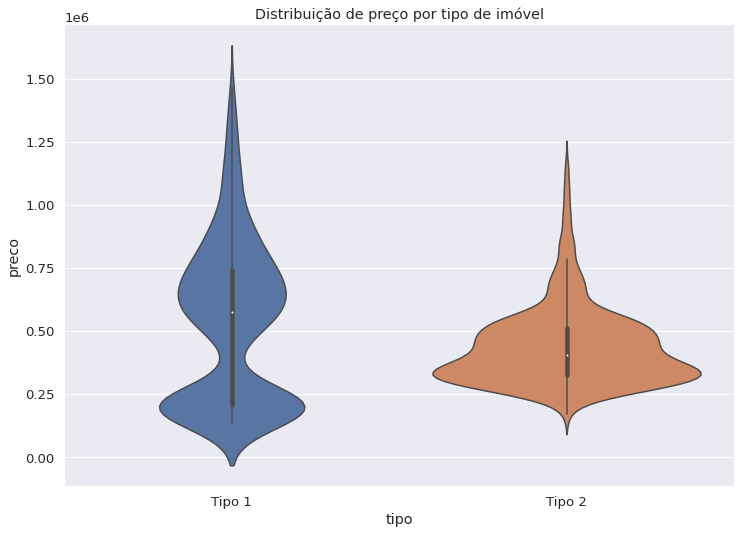

In [7]:
fig, ax = plt.subplots()
sns.violinplot(
    data=dados[dados.tipo.isin(["Tipo 1", "Tipo 2"])][["preco", "tipo"]], 
    y="preco", 
    x="tipo", 
    ax=ax
)
plt.title("Distribuição de preço por tipo de imóvel");

Além da distribuição das variáveis do nosso conjunto de dados (Análise Descritiva Univariada), podemos explorar relações entre pares utilizando a visualização `pairplot` do `seaborn` (Análise Descritiva Multivariada), que combina Funções de Densidade de Probabilidade (FDP, em inglês, *Probability Density Function*) com Gráficos de Disperção (`scatterplot`), como demonstrado na célula a seguir.

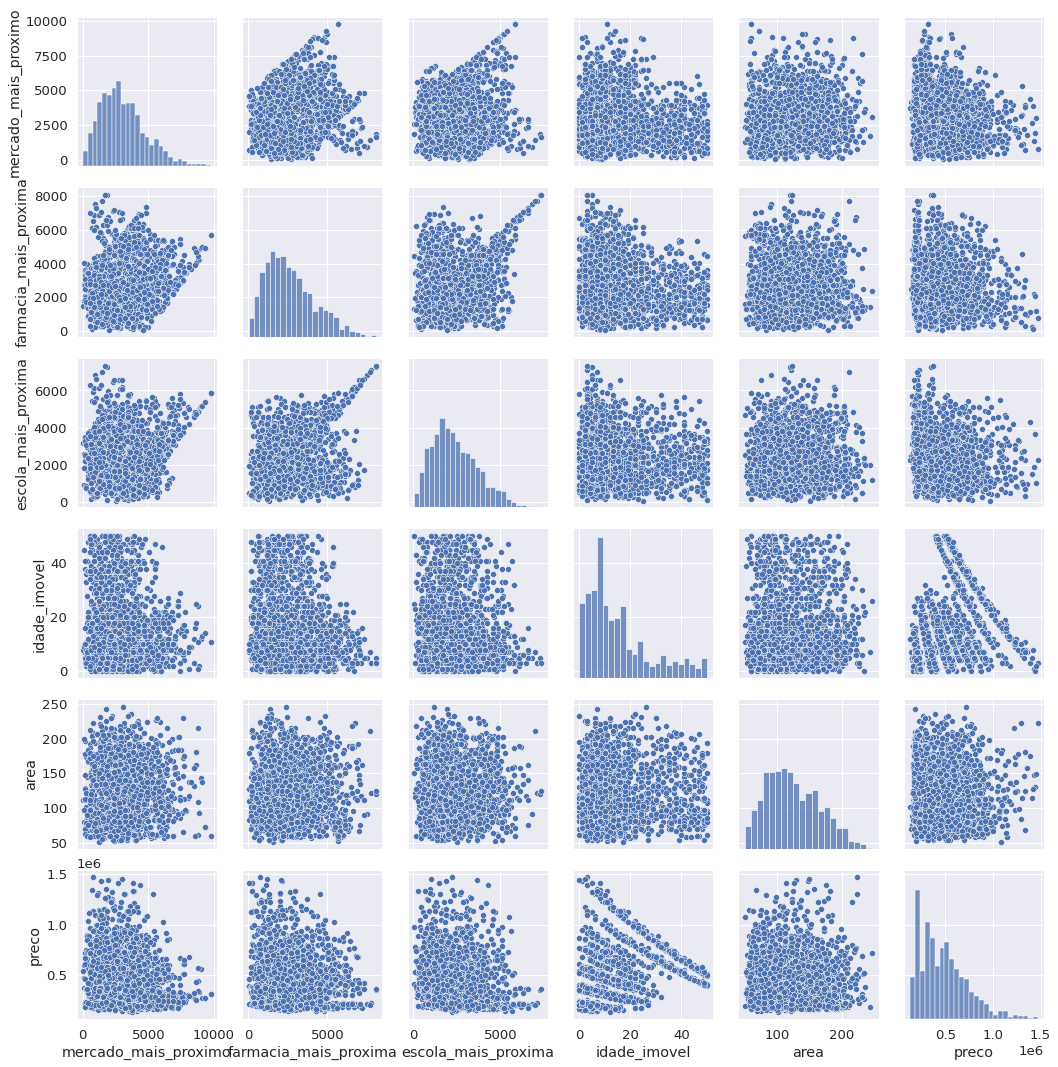

In [8]:
# A função .drop descarta algumas colunas do nosso DataFrame
sns.pairplot(
    dados.drop(columns=["loc_x", "loc_y", "num_penit_4km", "num_penit_500m"])
)

Utilizando a função `corr` do **Pandas**, junto com a visualização de mapa de calor do `heatmap` do `seaborn`, é possível criar um correlograma para mensurar, visualmente, as correlações entre as variáveis do conjunto de dados. Um adendo: a função `corr` admite apenas valores numéricos. Para contornar esse problema, podemos usar a função `select_dtypes` com o argumento `exclude="object"` para selecionar todas as colunas em que o tipo é diferente de `object`, ou seja, apenas as colunas que contém valores numéricos.

<AxesSubplot:>

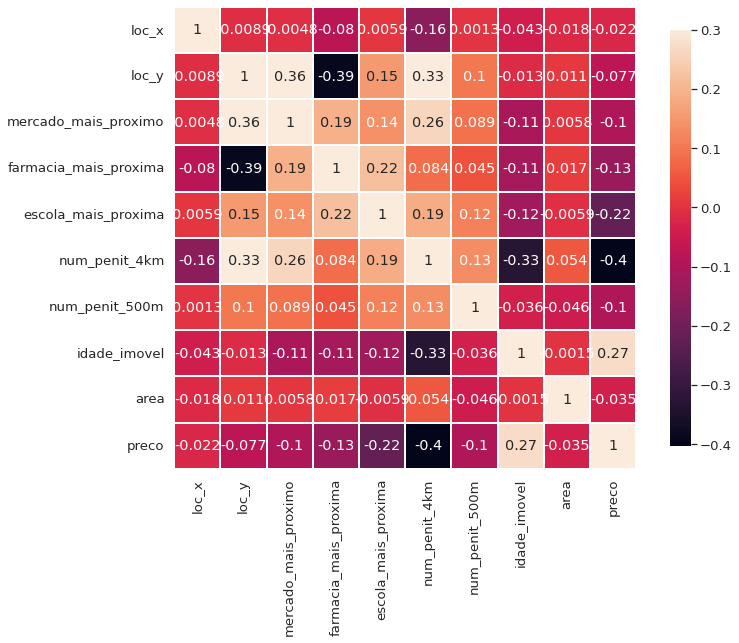

In [9]:
corr = dados.select_dtypes(exclude="object").corr()
sns.heatmap(corr, 
            annot=True,
            square=True, 
            vmax=.3, 
            linewidths=2, 
            cbar_kws={"shrink": .9})

1.1 - Exercício - Análise Exploratória Univariada
--------------------------------------------------------------------

Realize uma Análise Exploratória Univariada nas demais variáveis deste conjunto de dados.

1.2 - Exercício - Tratamento de dados
-----------------------------------------------------

O conjunto de dados imobiliários contém alguns registros de **localidades** e **tipos** de imóvel pouco observados e/ou incorretos.  

**Missão**: Remova estes registros minoritários e/ou incorretos do conjunto de dados, e persista o resultado em um arquivo `csv` chamado "dados_tratados.csv". Este arquivo será o ponto de partida da nossa próxima aula.

Dicas: Estude, por meio da documentação do **Pandas**, o que faz a função `value_counts(dropna=False)`

2 - Detecção de Outliers
====================

Um outlier é um valor atípico ou anômalo encontrado em um conjunto de dados, com o potencial para distorcer análises estatísticas e treinamento de modelos.

Para identificá-los, infelizmente, não existe uma receita mágica. Entretanto, com o uso de ferramentas estatísticas, criatividade e entendimento do problema, podemos encontrar caminhos para eliminá-los de nossa base de estudo.


Para dar suporte ao entendimento deste módulo, segue abaixo algumas expressões frequentemente utilizadas no âmbito de **estatística** para descrever a distribuição de **variáveis aleatórias**:


$X \sim N(\mu, \sigma^2)$, variável aleatória $X$ que segue uma Distribuição Gaussiana (ou Normal) de média $\mu$ e variância $\sigma^2$  
$X \sim U(a, b)$, variável aleatória $X$ que segue uma Distribuição Uniformemente Distribuida no intervalo $[a, b]$  
$X \sim B(p)$, variável aleatória discreta $X$ que segue uma distribuição de Bernoulli com parâmetro $p$

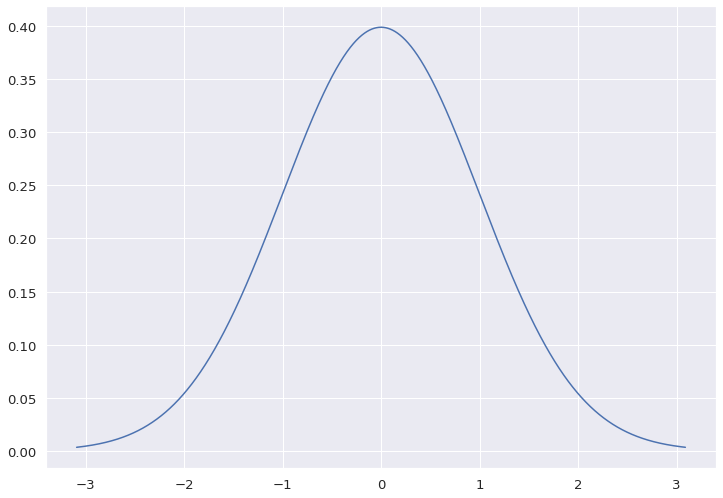

In [10]:
from scipy.stats import norm
import numpy as np

x = np.arange(norm.ppf(0.001), norm.ppf(0.999), 0.001)
plt.plot(x, norm.pdf(x))

Detectando outliers em variáveis independentes (análise univariada)
-------------------------------------------------------------------------------------------------

Neste exemplo, utilizaremos um conjunto de dados sintético, com apenas duas variáveis (1 numérica e outra categórica), para ilustrar o emprego de técnicas para detecção de anomalias univariadas em um problema de variáveis independentes entre si.

A variável numérica, denominada $x$, é uma variável aleatória que segue uma Distribuição Gaussiana $x \sim N(10, 4)$  
A variável categórica, denominada $y$, é uma variável aleatória discreta que segue uma distribuição de bernoulli $y \sim B(0.6)$

In [11]:
from scipy.stats import bernoulli
import random

random.seed(21) # Fixando a semente aleatória para reprodução de resultados
np.random.seed(21)

samples = 200
x = 2 * np.random.randn(samples) + 10
y = bernoulli.rvs(size=samples, p=0.6)

def pert_x(x):
    """
    Função geradora de outliers.
    Para cada variável aleatória `x`, essa função tem 2% de probabilidade de retornar
    seu valor multiplicado por 3.
    """
    if np.random.rand() < 0.02:
        return x * 3
    return x

def pert_y(y):
    """
    Função geradora de outliers
    Para cada variável aleatória discreta `y`, existe uma probabilidade de 5% de seu valor
    ser alterado para um número uniformemente distribuído no intervalo [0, 3].
    """
    if np.random.rand() < 0.05:
        return np.random.randint(low=0, high=4)
    return y


df = pd.DataFrame(np.vstack([x, y]).T, columns=["x", "y"])
df.x = df.x.apply(pert_x)
df.y = df.y.apply(pert_y)
df.sample(14).T

,132,61,135,86,190,165,138,50,199,63,176,9,106,147
x,7.597742,11.495363,9.301656,13.10053,10.817826,9.746875,9.411337,9.333467,10.918177,9.187352,7.224891,9.974748,8.287659,8.594063
y,0.000000,0.000000,0.000000,1.00000,1.000000,2.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000


Para encontrar os outliers da variáveis numérica $x$, podemos utilizar:

 - **Z-score**: Quando convertemos cada amostra de $x$ em uma variável aleatória $N(0,1)$, utilizando a fórmula $Z = (x - \mu) / \sigma$, obtemos o *Z-Score*. Este escore nos diz em quantos "desvios padrões" de distância a amostra está do valor médio. Podemos assumir que qualquer valor com $|Z| > 2.576$ (valor $2.576$ escolhido pois representa um intervalo de confiança de $99\%$) corresponde a um outlier;
 
 - **Boxplot**: O limiar inferior ($Q1 - 1.5IQ$) e o limiar superior ($Q3 + 1.5IQ$) de um boxplot são calculados a partir da distância interquartil $IQ = Q3 - Q1$. Os valores que ultrapassam esses limiares são ilustrados, no gráfico, por pequenos pontos pretos, os quais representam potenciais outliers;
 
 - **Histograma**: Em um histograma, outliers univariados também tender a ficar visíveis. Qualquer descontinuidade em uma distribuição pode significar potênciais anomalias;
 
 - **Estimativa de densidade de Kernel (KDE, Kernel Density Estimation)**: Similar ao *Histograma*, porém, utilizado para estimar **densidade** ao invés da **frequência**. Não é comum o emprego de *KDE* na detecção de anomalias, mas nada o impede de utilizado para essa tarefa.
 
**CUIDADO**: O *Z-Score* e o pode apresentar falso-positivos quando sua variável numérica não segue uma distribuição normal (Gaussiana). O *Z-Score* é um método paramétrico, ou seja, assume que a distribuição dos seus dados segue uma distribuição normal de média $\mu$ e desvio padrão $\sigma$.

,x,x_abs_zscore
133,35.740878,7.574721
127,29.816703,5.805477
42,27.460195,5.101711
159,20.036321,2.884585
82,4.280624,1.820824
153,16.188963,1.735579
75,15.510007,1.532810
97,15.205627,1.441907
77,15.039797,1.392382
122,5.864744,1.347730


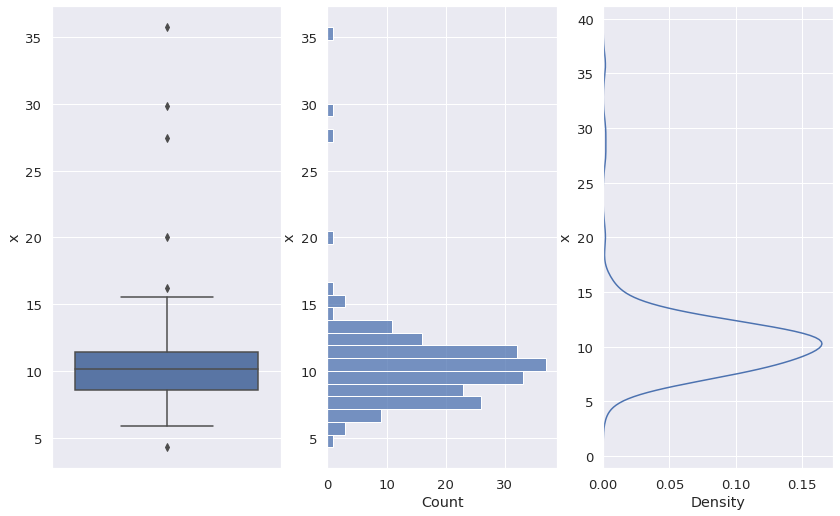

In [12]:
fig, ax = plt.subplots(figsize=(14, 8.5))
ax = plt.subplot(131); sns.boxplot(data=df, y="x", ax=ax)
ax = plt.subplot(132); sns.histplot(data=df, y="x", ax=ax)
ax = plt.subplot(133); sns.kdeplot(data=df, y="x", ax=ax)

# Criando uma cópia do dataframe original
df_aux = df.copy()

# Calculando o Z-Score e seu valor absoluto
df_aux["x_zscore"] = (df_aux.x - df_aux.x.mean()) / df_aux.x.std()
df_aux["x_abs_zscore"] = df_aux.x_zscore.abs()

# Ordenando os dados de maneira decrescente
df_aux.sort_values(by="x_abs_zscore", ascending=False)[["x", "x_abs_zscore"]].head(10)

,148,143,1,123,73,26,46,57,185,156
index,156.000000,150.000000,1.000000,129.000000,74.000000,26.000000,47.000000,58.000000,194.000000,165.000000
x,13.417672,7.690273,9.777608,12.117938,10.868616,11.288319,7.917467,9.447145,10.552668,9.746875
y,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


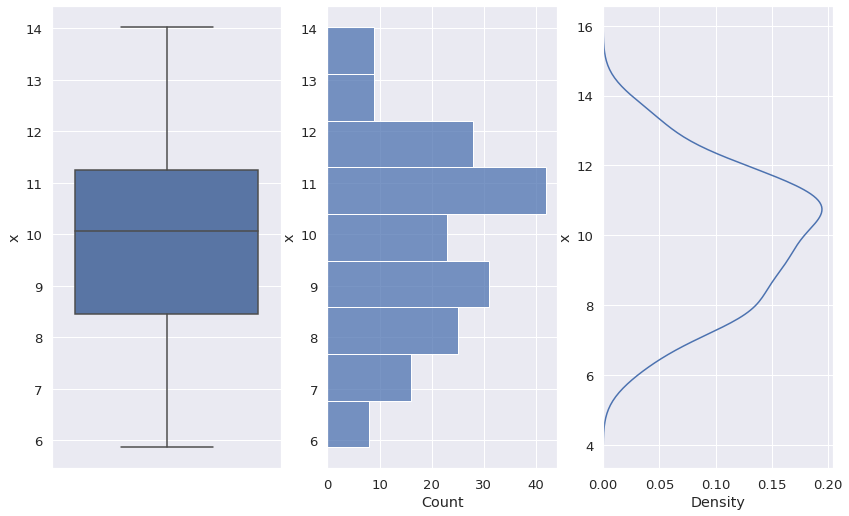

In [13]:
def remove_outliers_using_abs_zscore(dataframe, column, cutpoint=2.576, maxiter=5):
    """
    Remove outliers da variável `column` de um conjunto de dados `dataframe` utilizando 
    um ponto de corte `cutpoint`. Esta função é executada recursivamente até que nenhum
    ponto possa ser removido do conjunto de dados, ou o número de iterações seja maior
    ou igual à `maxiter`.
    
    :dataframe: Um dataframe do pandas
    :column: O nome da coluna alvo que contém a variável numérica seguindo uma distribuição gaussiana
    :cutpoint: Ponto de corte (valores acima de `cutpoint` desvios padrão serão removidos do conjunto)
    :maxiter: Número máximo de iterações
    """
    aux_df = dataframe.copy()
    iter_n = 0

    for it in range(maxiter):
        aux_df["z_score"] = (aux_df[column] - aux_df[column].mean()) / aux_df[column].std()
        cut_indexes = aux_df["z_score"].abs() >= cutpoint
        
        if (cut_indexes.sum()) == 0:
            break
        
        aux_df = aux_df[~cut_indexes]
    
    return dataframe.iloc[aux_df.index.values].copy().reset_index()


df1 = remove_outliers_using_abs_zscore(df, "x")

fig, ax = plt.subplots(figsize=(14, 8.5))
ax = plt.subplot(131); sns.boxplot(data=df1, y="x", ax=ax)
ax = plt.subplot(132); sns.histplot(data=df1, y="x", ax=ax)
ax = plt.subplot(133); sns.kdeplot(data=df1, y="x", ax=ax)

df1.sample(10).T

1.0    0.556122
0.0    0.443878
Name: y, dtype: float64

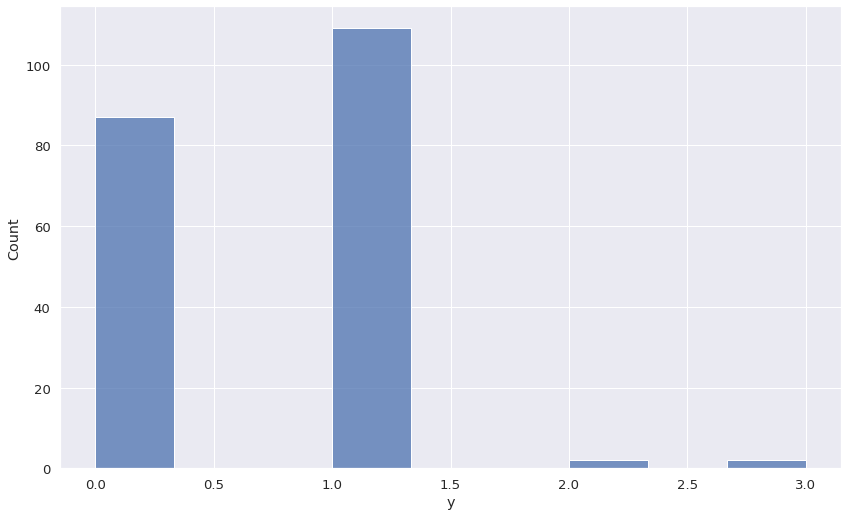

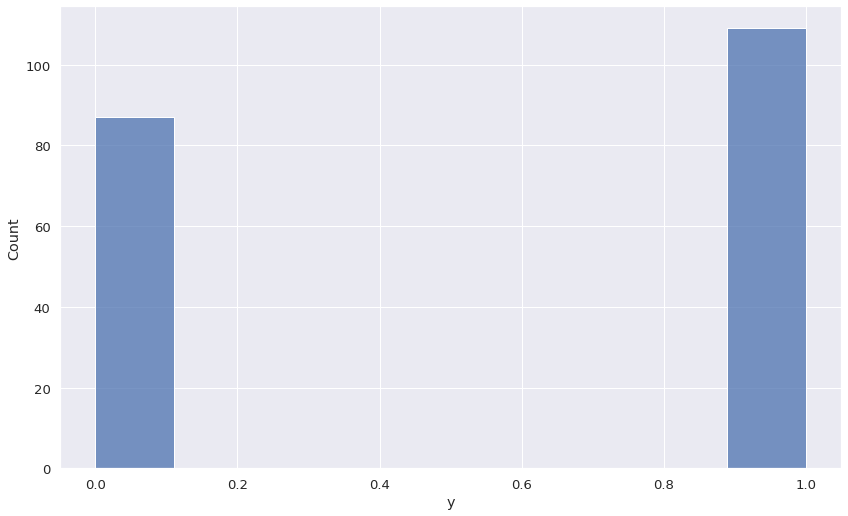

In [14]:
fig, ax = plt.subplots(figsize=(14, 8.5))
ax = plt.subplot(111); sns.histplot(data=df, x="y", ax=ax)
df.y.value_counts(dropna=False, normalize=True)

df2 = df[df.y.isin([0, 1])].copy()

fig, ax = plt.subplots(figsize=(14, 8.5))
ax = plt.subplot(111); sns.histplot(data=df2, x="y", ax=ax)

df2.y.value_counts(dropna=False, normalize=True)

Detectando outliers em variáveis dependentes (análise multivariada)
----------------------------------------------------------------------------------------------------

Neste segundo exemplo, criaremos um outro conjunto de dados sintéticos, com duas variávies numéricas, de acordo com a seguinte equação:

\begin{equation}
    p = 1.57 h + e + a + b
\end{equation}

onde $p$ é o peso da pessoa (em kg), $h$ é a altura da pessoa, e $e$ é um ruído branco $e \sim N (0, \sigma^2)$, e $a$ e $b$ são vetores de perturbação (utilizados para amplificar os outliers sintéticos).
Suponhamos que $h$ seja uma variável aleatória, tal que $h \sim N (1.74, 0.10^2)$.

**Obs.**: Ruído branco é o nome dado à uma distribuição Gaussiana com média 0 e variância $\sigma^2$.

In [15]:
random.seed(18) # Fixando a semente aleatória para reprodução de resultados

# Quantidade de amostras
samples = 200

def perturbacao(samples, std, prob):
    """
    Gerador de perturbação Gaussiana.
    
    :samples: Número de amostras no vetor de perturbação.
    :std: Desvio padrão da perturbação Gaussiana.
    :prob: Probabilidade de ocorrência.
    """
    return std * np.random.randn(samples) * (np.random.rand(samples) < prob) * 1.0

a = perturbacao(samples, 0.2, 0.01)
b = perturbacao(samples, 10, 0.05)
e = 1 * np.random.randn(samples)

h = 0.10 * np.random.randn(samples) + 1.74 + a
p = 45 * h + e + b

In [16]:
def eigsorted(cov):
    """
    Encontra os auto-valores e auto-vetores de uma matriz de variância-covariância.
    Os auto-valores e auto-vetores nos ajudam a normalizar amostras de distribuições
    multivariadas.
    
    :cov: Matriz de variância-covariância.
    """
    vals, vecs = np.linalg.eigh(cov)
    order = vals.argsort()[::-1]
    return vals[order], vecs[:,order]
    
def plot_cov_ellipse(mean, cov, nstd=2, ax=None, **kwargs):
    """
    Função utiliada para desenhar uma elipse que representa o intervalo
    de confiança de uma distribuição bivariada (Gaussiana em duas dimensões).
    
    :mean: Ponto central da elipse (gaussiana bivariada)
    :cov: Matrix de variância-covariância da distribuição gaussiana bivariada
    :nstd: Limite de confiança, em termos de desvios padrões
    :ax: Handler em que a elipse deve ser desenhada
    """


    if ax is None:
        ax = plt.gca()
    
    vals, vecs = eigsorted(cov)
    theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))

    # Width and height are "full" widths, not radius
    width, height = 2 * nstd * np.sqrt(vals)
    ellip = Ellipse(xy=mean, width=width, height=height, angle=theta, **kwargs)

    ax.add_artist(ellip)
    return ellip

Primeiramente, vamos observar a relação entre peso e altura. Na sintetização dos dados, salvamos os índices das
perturbações (outliers sintéticos) adicionados à amostra, os quais são representados por pontos em vermelho em nosso gráfico de disperção. 

Text(0, 0.5, 'Altura')

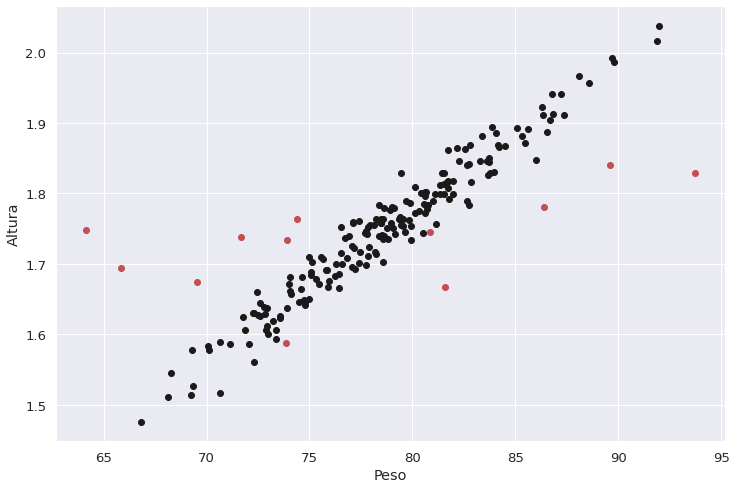

In [17]:
# Visualizando os dados por meio de um scatter-plot (gráfico de disperção)
fig = plt.subplots(figsize=(12, 8))
normal_idx = (a == 0) & (b == 0)
plt.plot(p[normal_idx], h[normal_idx], 'k.', ms=12)
plt.plot(p[~normal_idx], h[~normal_idx], 'r.', ms=12)
plt.xlabel("Peso")
plt.ylabel("Altura")

Nota-se que existe uma relação linear entre Peso e Altura, e qua a distribuição das amostras se assemelha a uma **distribuição multivariada normal**. Podemos calcular o centróide desta distribuição usando a função ``mean``, e a matriz de variância-covariância com a função ``cov``, ambas da biblioteca ``numpy``.

Para visualizar os limiares da distribuição, dado um intervalo de confiança, desenhando uma elipse parametrizada por meio da centróide e dos auto-vetores da matriz de variância-covariância da distribuição.

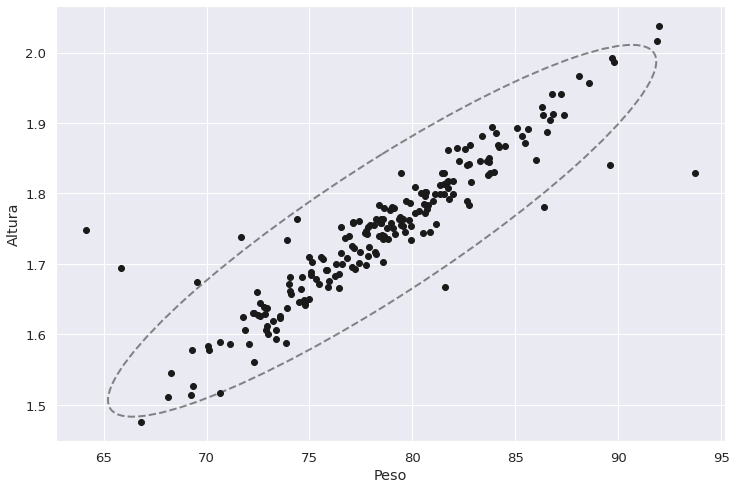

In [18]:
from matplotlib.patches import Ellipse

# Visualizando os dados por meio de um scatter-plot (gráfico de disperção)
fig = plt.subplots(figsize=(12, 8))
normal_idx = (a == 0) & (b == 0)
plt.plot(p, h, 'k.', ms=12)
# plt.plot(p[normal_idx], h[normal_idx], 'k.', ms=12)
# plt.plot(p[~normal_idx], h[~normal_idx], 'r.', ms=12)
plt.xlabel("Peso")
plt.ylabel("Altura")

# Adicionando ao scatter plot uma elipse, representando o desvio de 2.576 (99%) desvios padrões
# da centróide da distribuição dos dados.
data = np.vstack([p, h]).T
mean = data.mean(axis=0)
cov = np.cov(data, rowvar=0)
plot_cov_ellipse(mean, cov, nstd=2.576, color="k", ls="--", lw=2, fc=None, fill=False, alpha=0.5)

Também podemos utilizar a pacote ``stats`` da biblioteca sicpy, para nos auxiliar na criação de um gráfico de contorno (projeção 3D sobre um plano 2D).

Text(0, 0.5, 'Altura')

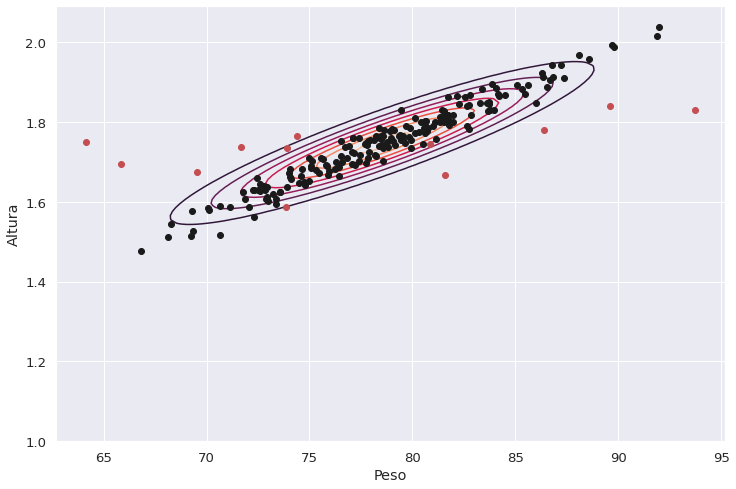

In [19]:
from scipy.stats import multivariate_normal
mvn = multivariate_normal(mean=mean, cov=cov)

X, Y = np.meshgrid(np.linspace(65, 90, 100), np.linspace(1, 2, 100))
Z = np.zeros_like(X)

for i in range(100):
    for j in range(100):
        Z[i][j] = mvn.pdf([X[i][j], Y[i][j]])
        
fig = plt.subplots(figsize=(12, 8))
plt.contour(X, Y, Z)
normal_idx = (a == 0) & (b == 0)
plt.plot(p[normal_idx], h[normal_idx], 'k.', ms=12)
plt.plot(p[~normal_idx], h[~normal_idx], 'r.', ms=12)
plt.xlabel("Peso")
plt.ylabel("Altura")

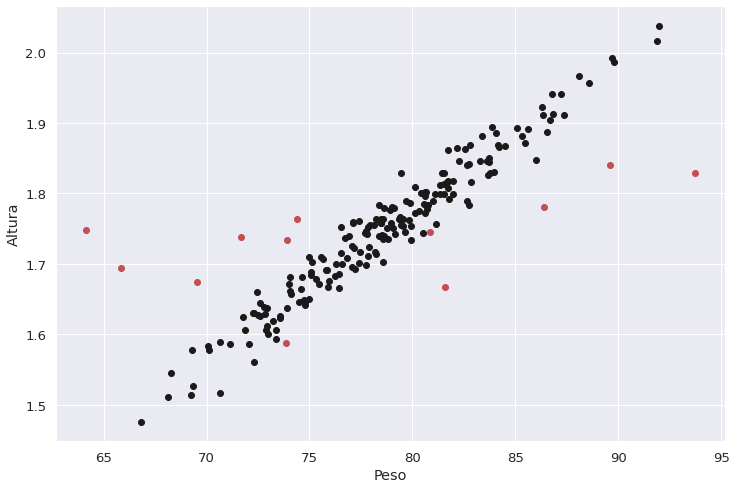

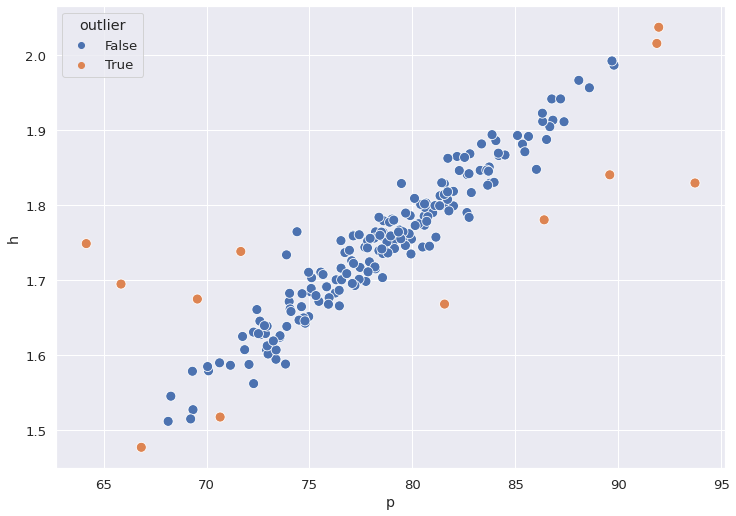

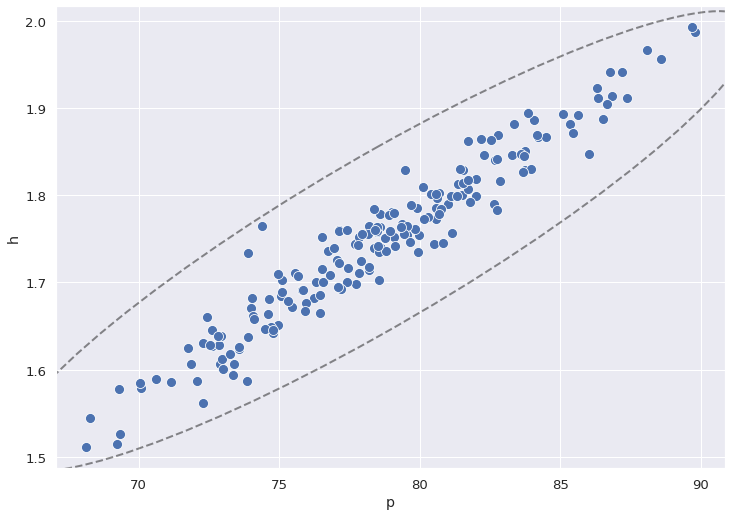

In [20]:
def filter_multinorm(dataframe, columns, n_stds=2.576):
    # Boa prática, copiando o dataframe.
    dataframe = dataframe.copy()
    # Extraindo minha linhas e colunas (Nlinhas, 2 var. numericas)
    X = dataframe[columns].values
    mean = X.mean(axis=0) # Calcula vetor média da Dist. Multi [mean(x), mean(y)]
    cov = np.cov(X, rowvar=0) # Calcula matriz var-cor da Dist. Multi
    
    vals, vecs = eigsorted(cov) # Auto-valores & Auto-vetores
    
    Z = (X - mean).dot(vecs)
    Zstd = np.sqrt(np.diag(np.cov(Z, rowvar=0)))
    Zvals = Z / Zstd
    
    # Distances from origin
    D = np.sqrt((Zvals ** 2).sum(axis=1))
    dataframe["outlier"] = np.abs(D) >= n_stds
    return dataframe
    
df = pd.DataFrame(np.vstack([p, h]).T, columns=["p", "h"])
df = filter_multinorm(df, ["p", "h"])

fig = plt.subplots(figsize=(12, 8))
normal_idx = (a == 0) & (b == 0)
plt.plot(p[normal_idx], h[normal_idx], 'k.', ms=12)
plt.plot(p[~normal_idx], h[~normal_idx], 'r.', ms=12)
plt.xlabel("Peso")
plt.ylabel("Altura")
plt.figure()
sns.scatterplot(data=df, x="p", y="h", hue="outlier", s=100)
plt.figure()
sns.scatterplot(data=df[~df.outlier], x="p", y="h", s=100)

data = np.vstack([p, h]).T
mean = data.mean(axis=0)
cov = np.cov(data, rowvar=0)
plot_cov_ellipse(mean, cov, nstd=2.576, color="k", ls="--", lw=2, fc=None, fill=False, alpha=0.5)

Curiosidade - Teorema Central do Limite
=================================

Afirma que, quando o tamanho de uma amostra aumenta, a distribuição amostral da **média** converge para uma distribuição normal (gaussiana).

Na célula abaixo, altere o valor da variável **samples**, e perceba que, quanto maior for o seu valor, mais próxima estará de uma **gaussiana** a distribuição da **média** das amostras aleatórias.

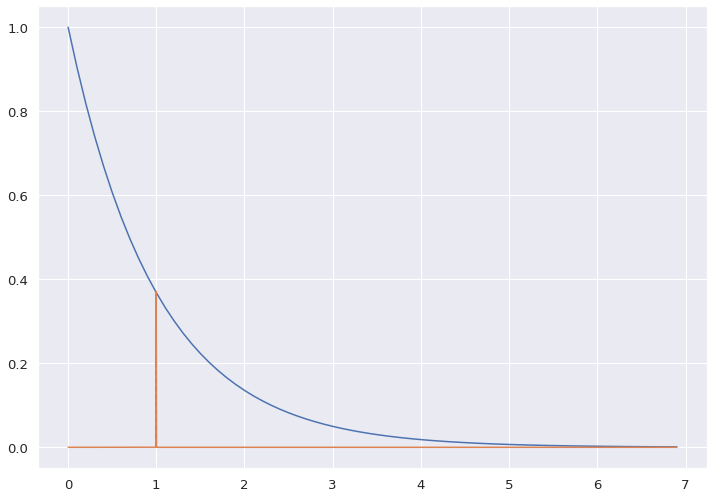

In [21]:
from scipy.stats import expon, norm

lower_bound = 0.001
upper_bound = 1 - lower_bound
samples = 1000000

x = np.arange(expon.ppf(lower_bound), expon.ppf(upper_bound), 0.1)
y = expon.pdf(x)

plt.plot(x, y)

exp_mean = (x * y * 0.1).sum()
plt.plot([exp_mean, exp_mean], [0, expon.pdf(exp_mean)], 'k--')

expon.rvs(size=samples).mean()

y_mean = []
for i in range(x.shape[0]):
    y_mean.append(expon.rvs(size=samples).mean())
y_mean = np.array(y_mean)

gauss = norm(*norm.fit(y_mean))
x_gauss = np.arange(x.min(), x.max(), 0.0001)
y_gauss = gauss.pdf(x_gauss)
plt.plot(x_gauss, y_gauss / gauss.pdf((x_gauss * y_gauss * 0.0001).sum()) * expon.pdf(exp_mean))